In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

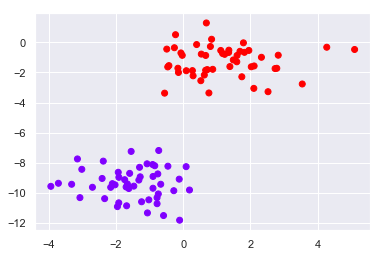

In [145]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100,2, centers=2, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')


In [146]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [147]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18]*rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-4.403242244115496,
 5.5656330119514665,
 -12.498805413331656,
 1.9654695793196044)

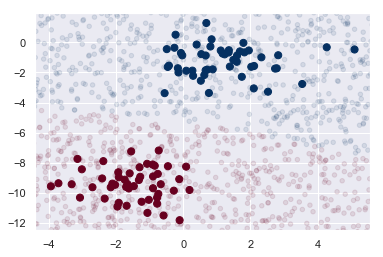

In [148]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)



In [167]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(3)

array([[0.967, 0.033],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.064, 0.936]])

### Multinomial Naive Bayes 
For text classifier

In [173]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [183]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics' ]
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [180]:
print(train.data[4])

From: vis@world.std.com (Tom R Courtney)
Subject: Re: Space Marketing would be wonderfull.
Organization: The World Public Access UNIX, Brookline, MA
Lines: 17

In some sense, I think that the folks who think the idea is wonderful, and the
folks who want to boycott anyone who has anything to do with this project are
both right.

That is, I think that space advertising is an interesting idea, and if someone
wants to try it out, more power to them. However, a company may discover that
the cost of launch is not the only cost of advertising, and a company who 
gauged that ill will would lose them more revenue than the advertising would
gain might decide to bow out of the project.

I got incensed when I read that Carl Sagan called this idea an "abomination." 
I don't think that word means what he thinks it does. Children starving in the
richest country in the world is an abomination; an ad agency is at worst just
in poor taste.

Tom Courtney




In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [184]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(80.90000000000006, 0.5, 'predict')

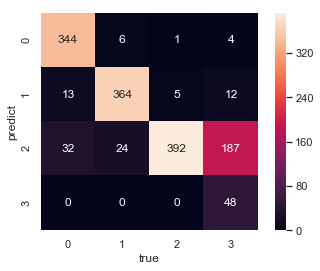

In [214]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels )
sns.heatmap(mat.T, square= True, annot=True, fmt='d')
plt.xlabel('true')
plt.ylabel('predict')

In [215]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [226]:
predict_category('star in the sky ')

'sci.space'